In [0]:
!pip install -q --upgrade ipython
!pip install -q --upgrade ipykernel

# Import libraries

In [0]:

import pandas as pd   #data processing
import re             #regular expressions
import seaborn as sns #data visualization
import numpy as np    #array processing
import matplotlib.pyplot as plt  #data visualization
from bs4 import BeautifulSoup    #handling HTML 
from collections import Counter  #container datatypes
from wordcloud import WordCloud  #data visualization
from sklearn.feature_extraction.text import TfidfTransformer #TF-IDF
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import SMOTE     #Oversampling
from imblearn.pipeline import make_pipeline  #Pipeline is just an abstract notion for performing sequence of different transformations
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold
import nltk #Natural Language toolkit
from nltk.corpus import stopwords# Natural Language toolkit
from nltk.stem import WordNetLemmatizer      #Lemmatization
from nltk.tokenize import WordPunctTokenizer #Tokenizer
from nltk.tokenize import RegexpTokenizer #Tokenizer

nltk.download('all') 

import warnings

pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [0]:
!pip install emoji --upgrade

import emoji

     |████████████████████████████████| 51kB 2.5MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=92de613d35b125786325df3037f08970386a099879a51283b0687f74eb93d479
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla P100-PCIE-16GB


##Load Data

In [0]:
train = pd.read_csv('train.csv')
overview = pd.read_csv('game_overview.csv')
test = pd.read_csv('test.csv')
train.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy li...,1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as...",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, d...",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because th...",1
4,5,Spooky's Jump Scare Mansion,2015.0,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free,...",1


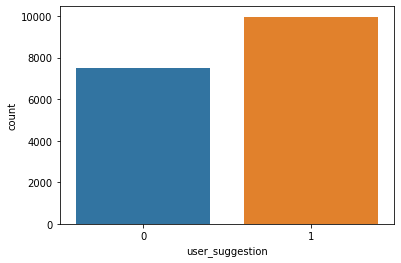

In [0]:
sns.countplot(train['user_suggestion'])

**Cleaning Emoji**

In [0]:

def clean_emoji(text):
    for c in text:
        if c in emoji.UNICODE_EMOJI:
            a=emoji.demojize(text)
            return a
    return text
train['user_review'] = train['user_review'].apply(clean_emoji)
test['user_review'] = test['user_review'].apply(clean_emoji)

In [0]:
X3 = train.copy()
X4 = test.copy()

In [0]:
X3['review_word_count'] = X3.apply(lambda row: len(row['user_review']), axis=1)
X4['review_word_count'] = X4.apply(lambda row: len(row['user_review']), axis=1)


In [0]:
X3.head(2)

,review_id,title,year,user_review,user_suggestion,review_word_count
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy li...,1,710
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as...",1,335


In [0]:
X4.head(2)

,review_id,title,year,user_review,review_word_count
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus...",433
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheatin...,944


# Cleaning Encodings

In [0]:
def check_encoding(text):
    st = (text.encode('ascii', 'ignore')).decode("utf-8")
    return st
X3['user_review'] = X3['user_review'].apply(lambda x : check_encoding(x))
X3['user_review'] = X3['user_review'].apply(lambda x : check_encoding(x))

In [0]:
X3['user_review'][0:4]

0    I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy li...
1    Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as...
2    A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, d...
3    Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because th...
Name: user_review, dtype: object

In [0]:
X4['user_review'][0:4]

0    Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus...
1    I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheatin...
2    Edit 11/12/18I have tried playing CS:GO recently and it has only dramatically gotten worse, now players are openly and obviously cheating, and even saying it in chat about walls and aims, people a...
3    The game is great. But the community is the worst.If you're into a match with a russian, maybe it's fine, most of the times not. But when there's a bunch of them, expect the worst. And I literally...
Name: user_review, dtype: object

# Removing URLs from the reviews

In [0]:
X3['user_review'] = X3['user_review'].apply(lambda x:re.sub(r'http\S+', '', x))
X4['user_review'] = X4['user_review'].apply(lambda x:re.sub(r'http\S+', '', x))

In [0]:
X3['user_review'][0:4]

0    I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy li...
1    Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as...
2    A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, d...
3    Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because th...
Name: user_review, dtype: object

In [0]:
X4['user_review'][0:4]

0    Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus...
1    I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheatin...
2    Edit 11/12/18I have tried playing CS:GO recently and it has only dramatically gotten worse, now players are openly and obviously cheating, and even saying it in chat about walls and aims, people a...
3    The game is great. But the community is the worst.If you're into a match with a russian, maybe it's fine, most of the times not. But when there's a bunch of them, expect the worst. And I literally...
Name: user_review, dtype: object

# Remove repeated words and characters


In [0]:
import re
def repeat_word_char(text):
    re_word = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    re_char = re.sub(r'(.)\1+', r'\1\1', re_word) 
    return re_char
X3['user_review'] = X3['user_review'].apply(repeat_word_char)
X4['user_review'] = X4['user_review'].apply(repeat_word_char)

In [2]:
X3

NameError: ignored

In [0]:
X4

,review_id,title,year,user_review,review_word_count
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus...",433
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheatin...,944
2,1605,Counter-Strike: Global Offensive,2018.0,"Edit 11/12/18I have tried playing CS:GO recently and it has only dramatically gotten worse, now players are openly and obviously cheating, and even saying it in chat about walls and aims, people a...",3136
3,1606,Counter-Strike: Global Offensive,2015.0,"The game is great. But the community is the worst.If you're into a match with a russian, maybe it's fine, most of the times not. But when there's a bunch of them, expect the worst. And I literally...",377
4,1607,Counter-Strike: Global Offensive,2015.0,"I thank TrulyRazor for buying this for me a long time ago -- I insisted to him that I would not play it. Seems I was wrong.Most around me have always known me for, perhaps not absolutely hating, b...",5666
...,...,...,...,...,...
8040,25198,GUNS UP!,2017.0,"Early Access ReviewGuns UP!Positive: Good Idea, addicting and lots of fun to play as a WW2 commander. Very Good integrity for a game with early access. Not having to wait for structures to build. ...",468
8041,25199,GUNS UP!,2018.0,"After 170 hrs, my review. DO NOT SPEND ANY MONEY. It would seam as if the better you do the more it cheats you. Almost coaxing you to spend money. Ive seen things, unexplainable things that only...",1044
8042,25200,GUNS UP!,2018.0,"Pros:-Fun GameplayCons: -Micro %$#*ing transactions-Doesn't really get any updates except bug fixes-The players which have been playing the longest usally are the strongest, meaning that other pla...",403
8043,25201,GUNS UP!,2018.0,"Actualy saucy, I definetly suggest to players who'd life a new taste of tower defence where you can now attack as well as defend. On the defending side of the game, you can defend against players,...",771


#  Remove Early_Acces_review 
### which is default noise in almost all reviews

In [0]:
def early_remove(text):
    if 'Early Access Review' in text:
        a=text.split('Early Access Review')[1]
        return a
    else:
        return text
        
X3['user_review'] = X3['user_review'].apply(early_remove)  
X4['user_review'] = X4['user_review'].apply(early_remove)        

In [0]:
for i in range(1000):
  print(i)
  print(X3['user_review'][i])
  print()

0
I'm scared and hearing creepy voices.  So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times.  This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean').  Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd.  I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.

1
Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:

In [0]:
for i in range(1000):
  print(i)
  print(X4['user_review'][i])
  print()

0
Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus on changing the tick rate of the match making servers to 128 and improving VAC a lot. Those two are what customers really want and you should focus on. Not stickers, UI and HUD changes or skins. And stop messing around with the weapons.

1
I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheating problem. Bugs have been in the game for years and still haven't been fixed. Cheating is out of control. Over the past few years of playing, cheating has gotten worse and worse to the point now where I end up playing against a cheater almost every game. Valve implemented the new "trust" matchmaking system to combat some of these issues but its lackluster algorit



```
`# This is formatted as code`
```

# Approach 1
### In this approach we have used TFIDF and then applied all the basic ML models

In [0]:
from sklearn.model_selection import train_test_split
xtrain, xvalid, ytrain, yvalid = train_test_split(X3['user_review'].values, X3['user_suggestion'].values ,
                                                   random_state=42, 
                                                   test_size=0.1, shuffle=True)

In [0]:
 print (xtrain.shape)
 print (xvalid.shape)
 print(ytrain.shape)
 print (yvalid.shape)

(15744,)
(1750,)
(15744,)
(1750,)


In [0]:
 from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

 tfv = TfidfVectorizer(min_df=3,  max_features=None, 
             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
             stop_words = 'english')

# # Fitting TF-IDF to both training and test sets (semi-supervised learning)
 tfv.fit(xtrain) 
 tfv.fit(xvalid)
 tfv.fit(X4['user_review'])
 xtrain_tfv =  tfv.transform(xtrain) 
 xvalid_tfv =  tfv.transform(xvalid) 
 xtest_tfv  =  tfv.transform(X4['user_review'])


In [0]:
 xtest_tfv.shape , xtrain_tfv.shape

((8045, 39366), (15744, 39366))

In [0]:
# from sklearn.linear_model import LogisticRegression
# # Fitting a simple Logistic Regression on TFIDF
clf = LogisticRegression(C=3,max_iter=1000)
clf.fit(xtrain_tfv, ytrain)
predictions = clf.predict(xvalid_tfv)

from sklearn.metrics import f1_score, accuracy_score

print(f1_score(yvalid, predictions))
print(accuracy_score(yvalid,predictions))



0.8946594806467418
0.8771428571428571


In [0]:
 from sklearn.linear_model import RidgeClassifier
 ridgeclf=RidgeClassifier(tol=1e-2, solver="sag").fit(xtrain_tfv,ytrain)
 ridge_pred=ridgeclf.predict(xvalid_tfv)
 from sklearn.metrics import f1_score, accuracy_score

 print(f1_score(ridge_pred,yvalid ))
 print(accuracy_score(ridge_pred,yvalid))



0.893491124260355
0.8765714285714286


In [0]:
 from sklearn.linear_model import SGDClassifier
 sgdclf=SGDClassifier(alpha=.0001, max_iter=50,penalty='l2').fit(xtrain_tfv,ytrain)
 sgd_pred=sgdclf.predict(xvalid_tfv)
 print(accuracy_score(sgd_pred,yvalid))

0.8794285714285714


In [0]:
 from sklearn.svm import LinearSVC

 svmclf=LinearSVC(dual=False, penalty='l2',tol=0.001)
 svmclf.fit(xtrain_tfv,ytrain)
 svmclf_pred=svmclf.predict(xvalid_tfv)
 print(accuracy_score(svmclf_pred,yvalid))

0.8702857142857143




```
# This is formatted as code
```

# Approach 2
### In this approach we have first used NLTK library to clean the data then applied TFIDF and basic ML models

In [0]:
 char_blacklist = list(chr(i) for i in range(32,127) if i <= 64 or i >= 91 and i <= 96 or i >= 123)
 stopwords = nltk.corpus.stopwords.words("english")
 stopwords.extend(char_blacklist)

 toker = RegexpTokenizer(r'((?<=[^\w\s])\w(?=[^\w\s])|(\W))+', gaps=True)
 wnl = WordNetLemmatizer()

In [0]:
 def clean(text):
     lines = (line.strip() for line in text.splitlines())
     chunks = (phrase.strip() for line in lines for phrase in line.split(" "))
     text = " ".join(chunk.lower() for chunk in chunks if chunk)
     tokens = [token.lower() for token in toker.tokenize(text)]
     token_stopwords = [w.lower() for w in tokens if w not in stopwords]
     token_lemmatize = [wnl.lemmatize(token) for token in token_stopwords]
     text = " ".join(text.lower() for text in token_lemmatize if text)
     return text

In [0]:
 X3 = train.copy()
X4 = test.copy()
X3["user_review"] = X3["user_review"].apply(lambda x : clean(x))
X4["user_review"] = X4["user_review"].apply(lambda x : clean(x))

X4["user_review"] = X4["user_review"].apply(lambda x : clean(x))

In [0]:
 from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

 tfv = TfidfVectorizer(min_df=3,  max_features=None, 
             strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
             ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
             stop_words = 'english')

#Fitting TF-IDF to both training and test sets (semi-supervised learning)
 tfv.fit(xtrain) 
 tfv.fit(xvalid)
 tfv.fit(X4['user_review'])
 xtrain_tfv_2 =  tfv.transform(xtrain) 
 xvalid_tfv_2 =  tfv.transform(xvalid) 
 xtest_tfv_2  =  tfv.transform(X4['user_review'])

In [0]:
 from sklearn.linear_model import LogisticRegression
# # Fitting a simple Logistic Regression on TFIDF
 clf = LogisticRegression(C=3,max_iter=1000)
 clf.fit(xtrain_tfv_2, ytrain)
 predictions = clf.predict(xvalid_tfv_2)

 from sklearn.metrics import f1_score, accuracy_score

 print(f1_score(yvalid, predictions))
 print(accuracy_score(yvalid,predictions))


0.8866995073891626
0.8685714285714285


In [0]:
# from sklearn.linear_model import RidgeClassifier
 ridgeclf=RidgeClassifier(tol=1e-2, solver="sag").fit(xtrain_tfv_2,ytrain)
 ridge_pred=ridgeclf.predict(xvalid_tfv_2)
 from sklearn.metrics import f1_score, accuracy_score

 print(f1_score(ridge_pred,yvalid ))
 print(accuracy_score(ridge_pred,yvalid))



0.8861629048086359
0.8674285714285714


# Approach 3 - Roberta

### In this we have trained our model on the Roberta algorithm 

In [0]:
X3

,review_id,title,year,user_review,user_suggestion,review_word_count
0,1,Spooky's Jump Scare Mansion,2016.0,I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy li...,1,710
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as...",1,335
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 100 before, but due to certain circumstances was unable to finish. Was not game related, do...",1,397
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.. yeah. The computer doesn't like to run this. Shame, because this...",1,280
4,5,Spooky's Jump Scare Mansion,2015.0,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free,...",1,334
...,...,...,...,...,...,...
17489,25535,EverQuest II,2012.0,"Arguably the single greatest mmorp that exists today, and now its free!! There is little to no competition for this game. Graphics that bend to a weak :heart_suit::heart_suit::heart_suit::heart_su...",1,1050
17490,25536,EverQuest II,2017.0,"An older game, to be sure, but has its own charm and holds a special place in my heart - having played it since I was young. Definitely still has some grind if you want to run through *all* of the...",1,1472
17491,25537,EverQuest II,2011.0,"When I frist started playing Everquest 2 it was amazing (its still great). The players were friendly and mature, there were lots of things to do (still is) but now days groups are tough to come by...",1,1642
17492,25538,EverQuest II,NaN,"cool game. THe only thing that REALLY PISSES ME OFF, is the ridable transport. It takes you through the most scenic route and then fakes you out on another docking platform, before looping back ar...",1,264


In [0]:
X4

,review_id,title,year,user_review,review_word_count
0,1603,Counter-Strike: Global Offensive,2015.0,"Nice graphics, new maps, weapons and models. But developers should listen to the customers a bit more. Developers you are focused too much on things that are not important at all. You should focus...",433
1,1604,Counter-Strike: Global Offensive,2018.0,I would not recommend getting into this at its current state. CSGO has hit rock bottom with Valve's missed promises of game changing updates and their lack of effort to combat the terrible cheatin...,944
2,1605,Counter-Strike: Global Offensive,2018.0,"Edit 11/12/18I have tried playing CS:GO recently and it has only dramatically gotten worse, now players are openly and obviously cheating, and even saying it in chat about walls and aims, people a...",3136
3,1606,Counter-Strike: Global Offensive,2015.0,"The game is great. But the community is the worst.If you're into a match with a russian, maybe it's fine, most of the times not. But when there's a bunch of them, expect the worst. And I literally...",377
4,1607,Counter-Strike: Global Offensive,2015.0,"I thank TrulyRazor for buying this for me a long time ago -- I insisted to him that I would not play it. Seems I was wrong.Most around me have always known me for, perhaps not absolutely hating, b...",5666
...,...,...,...,...,...
8040,25198,GUNS UP!,2017.0,"Guns UP!Positive: Good Idea, addicting and lots of fun to play as a WW2 commander. Very Good integrity for a game with early access. Not having to wait for structures to build. Negative: Has lots ...",468
8041,25199,GUNS UP!,2018.0,"After 170 hrs, my review. DO NOT SPEND ANY MONEY. It would seam as if the better you do the more it cheats you. Almost coaxing you to spend money. Ive seen things, unexplainable things that only...",1044
8042,25200,GUNS UP!,2018.0,"Pros:-Fun GameplayCons: -Micro %$#*ing transactions-Doesn't really get any updates except bug fixes-The players which have been playing the longest usally are the strongest, meaning that other pla...",403
8043,25201,GUNS UP!,2018.0,"Actualy saucy, I definetly suggest to players who'd life a new taste of tower defence where you can now attack as well as defend. On the defending side of the game, you can defend against players,...",771


In [0]:
overview

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,"['Horror', 'Free to Play', 'Cute', 'First-Person', 'Singleplayer', 'Psychological Horror', 'Indie', 'Adventure', 'Dark', 'Funny', 'Atmospheric', 'Action', 'Walking Simulator', 'Survival', 'Surviva...",Can you survive 1000 rooms of cute terror? Or will you break once the cuteness starts to fade off and you're running for your life from the unspeakable hideous beings that shake and writhe in bowe...
1,Sakura Clicker,Winged Cloud,Winged Cloud,"['Nudity', 'Anime', 'Free to Play', 'Mature', 'Sexual Content', 'Clicker', 'Female Protagonist', 'Singleplayer', 'Casual', 'Indie', 'Fantasy', 'NSFW', 'Memes', 'Funny', '2D', 'RPG', 'Story Rich', ...","The latest entry in the Sakura series is more action-packed than ever before! Sakura Clickers is a fast-paced, exciting adventure, full of content, in which you defeat your foes with the power of ..."
2,WARMODE,WARTEAM,WARTEAM,"['Early Access', 'Free to Play', 'FPS', 'Multiplayer', 'Shooter', 'Action', 'First-Person', 'Early Access', 'War', 'Massively Multiplayer', 'Co-op', 'Zombies', 'Singleplayer', 'Survival', 'Control...","Free to play shooter about the confrontation of two irreconcilable sides, represented by the government military housings and the armed hirelings. Try your hand at virtual battles with off-scale d..."
3,Fractured Space,Edge Case Games Ltd.,Edge Case Games Ltd.,"['Space', 'Multiplayer', 'Free to Play', 'PvP', 'MOBA', 'Action', 'Strategy', 'Sci-fi', 'Shooter', 'Space Sim', 'Tactical', 'Indie', 'Team-Based', 'Competitive', 'Co-op', 'Massively Multiplayer', ...",Take the helm of a gigantic capital ship and get ready for battle. Regular Episodes give you new maps and ways to fight - or play 5-v-5 PvE or PvP in classic Conquest – the high intensity moments ...
4,Counter-Strike: Global Offensive,"Valve, Hidden Path Entertainment",Valve,"['FPS', 'Multiplayer', 'Shooter', 'Action', 'Team-Based', 'Competitive', 'Tactical', 'First-Person', 'e-sports', 'PvP', 'Online Co-Op', 'Military', 'Co-op', 'Strategy', 'War', 'Trading', 'Difficul...","Counter-Strike: Global Offensive (CS: GO) expands upon the team-based action gameplay that it pioneered when it was launched 19 years ago.CS: GO features new maps, characters, weapons, and game mo..."
...,...,...,...,...,...
59,Bloons TD Battles,Ninja Kiwi,Ninja Kiwi,"['Free to Play', 'Tower Defense', 'Multiplayer', 'Strategy', 'Action', 'Competitive', 'PvP', 'Casual', 'Co-op', 'Funny', '2D', 'Massively Multiplayer', 'Family Friendly', 'Singleplayer', 'Difficul...",Play the top-rated tower defense franchise in this free head-to-head strategy game.It's monkey vs monkey for the first time ever - go head to head with other players in a Bloon-popping battle for ...
60,Cuisine Royale,Darkflow Software,Gaijin Distribution KFT,"['Early Access', 'Free to Play', 'Battle Royale', 'Survival', 'Multiplayer', 'Massively Multiplayer', 'Action', 'Shooter', 'FPS', 'Early Access', 'Funny', 'Open World', 'Violent', 'World War II', ...",Cuisine Royale is an all-kitchen-warfare Battle Royale game with the most honest system for Loot Boxes ever. It's made by developers of squad based MMO shooter Enlisted and is completely free. In ...
61,GUNS UP!,"Valkyrie Entertainment, LLC","PlayStation Mobile, Inc.","['Free to Play', 'Strategy', 'Multiplayer', 'Action', 'Casual', 'Tower Defense', 'Base Building', 'Massively Multiplayer', 'War', 'Early Access', 'Shooter']","In a mashup of RTS & Tower Defense, GUNS UP! is an action packed strategy game lets you build and upgrade your defenses, take your army onto the battlefield to wreak havoc on other players.Strateg..."
62,School of Dragons,"JumpStart Games, Inc.","JumpStart Games, Inc.","['Free to Play', 'Dragons', 'Adventure', 'Multiplayer', 'Massively Multiplayer', 'Open World', 'RPG', 'MMORPG', 'Family Friendly', 'Fantasy', 'Action', 'Online Co-Op', 'Singleplayer', 'Simulation'...","**Changewing Dragon now Available**Fly Fast. Train 

In [0]:
Train_final=X3.merge(overview,how='left',on='title')


In [0]:
Test_final=X4.merge(overview,how='left',on='title')


In [0]:
from fastai import *
from fastai.text import *
import os


In [0]:
pip install -q transformers


     |████████████████████████████████| 573kB 4.8MB/s 
     |████████████████████████████████| 890kB 47.6MB/s 
     |████████████████████████████████| 1.0MB 46.5MB/s 
     |████████████████████████████████| 3.7MB 43.2MB/s 


In [0]:
from pathlib import Path 

import os

import torch
import torch.optim as optim

import random 

from fastai.callbacks import *

# transformers
from transformers import PreTrainedModel, PreTrainedTokenizer, PretrainedConfig

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig
from transformers import RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig
from transformers import XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig
from transformers import XLMForSequenceClassification, XLMTokenizer, XLMConfig
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig
from transformers import AlbertForSequenceClassification, AlbertTokenizer, AlbertConfig

In [0]:
import fastai
import transformers
print('fastai version :', fastai.__version__)
print('transformers version :', transformers.__version__)

fastai version : 1.0.60
transformers version : 2.8.0


In [0]:
MODEL_CLASSES = {
    'bert': (BertForSequenceClassification, BertTokenizer, BertConfig),
    'xlnet': (XLNetForSequenceClassification, XLNetTokenizer, XLNetConfig),
    'xlm': (XLMForSequenceClassification, XLMTokenizer, XLMConfig),
    'roberta': (RobertaForSequenceClassification, RobertaTokenizer, RobertaConfig),
    'distilbert': (DistilBertForSequenceClassification, DistilBertTokenizer, DistilBertConfig),
    'albert':(AlbertForSequenceClassification,AlbertTokenizer, AlbertConfig)
}

In [0]:
# Parameters
seed = 10
use_fp16 = True
bs = 4

model_type = 'roberta'
pretrained_model_name = 'roberta-large'

In [0]:
model_class, tokenizer_class, config_class = MODEL_CLASSES[model_type]

In [0]:
def seed_all(seed_value):
    random.seed(seed_value) # Python
    np.random.seed(seed_value) # cpu vars
    torch.manual_seed(seed_value) # cpu  vars
    
    if torch.cuda.is_available(): 
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value) # gpu vars
        torch.backends.cudnn.deterministic = True  #needed
        torch.backends.cudnn.benchmark = False

In [0]:
seed_all(seed)


In [0]:
class TransformersBaseTokenizer(BaseTokenizer):
    """Wrapper around PreTrainedTokenizer to be compatible with fast.ai"""
    def __init__(self, pretrained_tokenizer: PreTrainedTokenizer, model_type = 'bert', **kwargs):
        self._pretrained_tokenizer = pretrained_tokenizer
        self.max_seq_len = pretrained_tokenizer.max_len
        self.model_type = model_type

    def __call__(self, *args, **kwargs): 
        return self

    def tokenizer(self, t:str) -> List[str]:
        """Limits the maximum sequence length and add the spesial tokens"""
        CLS = self._pretrained_tokenizer.cls_token
        SEP = self._pretrained_tokenizer.sep_token
        if self.model_type in ['roberta']:
            tokens = self._pretrained_tokenizer.tokenize(t, add_prefix_space=True)[:self.max_seq_len - 2]
            tokens = [CLS] + tokens + [SEP]
        else:
            tokens = self._pretrained_tokenizer.tokenize(t)[:self.max_seq_len - 2]
            if self.model_type in ['xlnet']:
                tokens = tokens + [SEP] +  [CLS]
            else:
                tokens = [CLS] + tokens + [SEP]
        return tokens


In [0]:
transformer_tokenizer = tokenizer_class.from_pretrained(pretrained_model_name)
transformer_base_tokenizer = TransformersBaseTokenizer(pretrained_tokenizer = transformer_tokenizer, model_type = model_type)
fastai_tokenizer = Tokenizer(tok_func = transformer_base_tokenizer, pre_rules=[], post_rules=[])

In [0]:
class TransformersVocab(Vocab):
    def __init__(self, tokenizer: PreTrainedTokenizer):
        super(TransformersVocab, self).__init__(itos = [])
        self.tokenizer = tokenizer
    
    def numericalize(self, t:Collection[str]) -> List[int]:
        "Convert a list of tokens `t` to their ids."
        return self.tokenizer.convert_tokens_to_ids(t)
        #return self.tokenizer.encode(t)

    def textify(self, nums:Collection[int], sep=' ') -> List[str]:
        "Convert a list of `nums` to their tokens."
        nums = np.array(nums).tolist()
        return sep.join(self.tokenizer.convert_ids_to_tokens(nums)) if sep is not None else self.tokenizer.convert_ids_to_tokens(nums)
    
    def __getstate__(self):
        return {'itos':self.itos, 'tokenizer':self.tokenizer}

    def __setstate__(self, state:dict):
        self.itos = state['itos']
        self.tokenizer = state['tokenizer']
        self.stoi = collections.defaultdict(int,{v:k for k,v in enumerate(self.itos)})

In [0]:
transformer_vocab =  TransformersVocab(tokenizer = transformer_tokenizer)
numericalize_processor = NumericalizeProcessor(vocab=transformer_vocab)

tokenize_processor = TokenizeProcessor(tokenizer=fastai_tokenizer, include_bos=False, include_eos=False)

transformer_processor = [tokenize_processor, numericalize_processor]

In [0]:
pad_first = bool(model_type in ['xlnet'])
pad_idx = transformer_tokenizer.pad_token_id

In [0]:
data_transclas = (TextList.from_df(Train_final, cols=['title','user_review','overview','tags','developer','publisher'], processor=transformer_processor)
             .split_by_rand_pct(0.1,seed=seed)
             .label_from_df(cols= 'user_suggestion').databunch(bs=bs, pad_first=False, pad_idx=0))

In [0]:
print('[CLS] token :', transformer_tokenizer.cls_token)
print('[SEP] token :', transformer_tokenizer.sep_token)
print('[PAD] token :', transformer_tokenizer.pad_token)
data_transclas.show_batch()
print('[CLS] id :', transformer_tokenizer.cls_token_id)
print('[SEP] id :', transformer_tokenizer.sep_token_id)
print('[PAD] id :', pad_idx)
test_one_batch = data_transclas.one_batch()[0]
print('Batch shape : ',test_one_batch.shape)
print(test_one_batch)

[CLS] token : <s>
[SEP] token : </s>
[PAD] token : <pad>


text,target
"<s> ĠHeroes Ġ& ĠGener als Ġif Ġu Ġwant Ġa Ġgame Ġwhere ĠU Ġas Ġplayer Ġare Ġfree Ġu Ġdon 't Ġwant Ġthis Ġright Ġnow . Ġunt ill Ġthe Ġgameplay Ġis Ġchanged Ġback Ġto Ġplay ĠSOL O Ġinstead Ġof ĠSQU AD , Ġthis Ġgame Ġcan 't Ġcount Ġon Ġa Ġposs itive Ġreview Ġfrom Ġme .. ĠHeroes Ġ& ĠGener als Ġis Ġa Ġfull Ġon , Ġall - out ĠWAR Ġexperience . ĠThousands Ġof",0
"<s> ĠHeroes Ġ& ĠGener als ĠMost Ġpay Ġto Ġwin Ġgame Ġever ; Ġeverything Ġis Ġjust Ġbased Ġon Ġmoney Ġand Ġbetter Ġweapons Ġor Ġbetter Ġvehicles , Ġno Ġskill Ġat Ġ Ġall ! You Ġsprint Ġfor Ġ4 Ġseconds Ġand Ġthen Ġyou Ġrun Ġout Ġof Ġbreath Ġand Ġso Ġyou Ġgotta Ġwalk Ġbut Ġso Ġsnipers Ġcan Ġget Ġyou Ġ( with Ġbought Ġweapons Ġbecause Ġit Ġwould Ġtake Ġhours Ġand Ġhours Ġto Ġunlock Ġthe Ġsniper Ġnormally",0
"<s> ĠHeroes Ġ& ĠGener als ĠGreat Ġidea , Ġbut Ġcurrent Ġgame Ġupdates Ġhave Ġruined Ġthe Ġgame Ġfor Ġnewcomers Ġand Ġcasual Ġgamers . ĠHeroes Ġand ĠGener als Ġis Ġa Ġtrue Ġ"" fre em ium "" Ġgame . ĠR TS Ġside Ġseems Ġlike Ġa Ġgood Ġidea Ġbut Ġit Ġjust Ġgets Ġworse Ġand Ġworse . ĠIf Ġyou Ġwant Ġto Ġcontinue Ġthe Ġr ts Ġside Ġgold Ġ( real Ġmoney ) Ġis Ġa Ġmust .",0
"<s> ĠFallout ĠShelter ĠI Ġget Ġwhy Ġpeople Ġdon 't Ġlike Ġit Ġfor Ġthe Ġmost Ġpart . Ġ ĠIt Ġreally Ġis Ġa Ġmobile Ġgame Ġbecause Ġof Ġthe Ġwaiting Ġand Ġit Ġisn 't Ġa Ġclick - fest Ġso Ġpeople Ġaren 't Ġenjoying Ġit Ġbecause Ġinstead Ġof Ġwatching Ġresources Ġbuild Ġinfinitely Ġwhile Ġthey Ġclick Ġlike Ġmonkeys Ġhaving Ġseizures Ġlocated Ġprimarily Ġin Ġtheir Ġfingers , Ġit 's Ġa Ġslower - paced Ġgame Ġwhere Ġresources",1


[CLS] id : 0
[SEP] id : 2
[PAD] id : 1
Batch shape :  torch.Size([4, 512])
tensor([[    0, 36183,  5855,  ...,  3934,   128,     2],
        [    0,  1771,  8314,  ...,    32,    80,     2],
        [    0, 27962, 32273,  ...,  2650,  1913,     2],
        [    0, 27962, 32273,  ...,   128, 10993,     2]])


In [0]:

class CustomTransformerModel(nn.Module):
    def __init__(self, transformer_model: PreTrainedModel):
        super(CustomTransformerModel,self).__init__()
        self.transformer = transformer_model
        
    def forward(self, input_ids, attention_mask=None):
        
        # attention_mask
        # Mask to avoid performing attention on padding token indices.
        # Mask values selected in ``[0, 1]``:
        # ``1`` for tokens that are NOT MASKED, ``0`` for MASKED tokens.
        attention_mask = (input_ids!=pad_idx).type(input_ids.type()) 
        
        logits = self.transformer(input_ids,
                                  attention_mask = attention_mask)[0]   
        return logits

In [0]:
config = config_class.from_pretrained(pretrained_model_name)
config.num_labels = 2
config.use_bfloat16 = use_fp16
print(config)


RobertaConfig {
  "_num_labels": 2,
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bad_words_ids": null,
  "bos_token_id": 0,
  "decoder_start_token_id": null,
  "do_sample": false,
  "early_stopping": false,
  "eos_token_id": 2,
  "finetuning_task": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 1024,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1"
  },
  "initializer_range": 0.02,
  "intermediate_size": 4096,
  "is_decoder": false,
  "is_encoder_decoder": false,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1
  },
  "layer_norm_eps": 1e-05,
  "length_penalty": 1.0,
  "max_length": 20,
  "max_position_embeddings": 514,
  "min_length": 0,
  "model_type": "roberta",
  "no_repeat_ngram_size": 0,
  "num_attention_heads": 16,
  "num_beams": 1,
  "num_hidden_layers": 24,
  "num_return_sequences": 1,
  "output_attentions": false,
  "output_hidden_states": false,
  "output_past": true,
  "pad_token_id": 1,


In [0]:
transformer_model = model_class.from_pretrained(pretrained_model_name, config = config)

custom_transformer_model = CustomTransformerModel(transformer_model = transformer_model)

In [0]:
from fastai.callbacks import *
from transformers import AdamW
from functools import partial

CustomAdamW = partial(AdamW, correct_bias=False)

learner = Learner(data_transclas, 
                  custom_transformer_model, 
                  opt_func = CustomAdamW, 
                  metrics=[accuracy, error_rate])

# Show graph of learner stats and metrics after each epoch.
learner.callbacks.append(ShowGraph(learner))

# Put learn in FP16 precision mode. --> Seems to not working
if use_fp16: learner = learner.to_fp16()

In [0]:
print(learner.model)

CustomTransformerModel(
  (transformer): RobertaForSequenceClassification(
    (roberta): RobertaModel(
      (embeddings): RobertaEmbeddings(
        (word_embeddings): Embedding(50265, 1024, padding_idx=1)
        (position_embeddings): Embedding(514, 1024, padding_idx=1)
        (token_type_embeddings): Embedding(1, 1024)
        (LayerNorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (encoder): BertEncoder(
        (layer): ModuleList(
          (0): BertLayer(
            (attention): BertAttention(
              (self): BertSelfAttention(
                (query): Linear(in_features=1024, out_features=1024, bias=True)
                (key): Linear(in_features=1024, out_features=1024, bias=True)
                (value): Linear(in_features=1024, out_features=1024, bias=True)
                (dropout): Dropout(p=0.1, inplace=False)
              )
              (output): BertSelfOutput(
                (dense)

In [0]:
list_layers = [learner.model.transformer.roberta.embeddings,
              learner.model.transformer.roberta.encoder.layer[0],
              learner.model.transformer.roberta.encoder.layer[1],
              learner.model.transformer.roberta.encoder.layer[2],
              learner.model.transformer.roberta.encoder.layer[3],
              learner.model.transformer.roberta.encoder.layer[4],
              learner.model.transformer.roberta.encoder.layer[5],
              learner.model.transformer.roberta.encoder.layer[6],
              learner.model.transformer.roberta.encoder.layer[7],
              learner.model.transformer.roberta.encoder.layer[8],
              learner.model.transformer.roberta.encoder.layer[9],
              learner.model.transformer.roberta.encoder.layer[10],
              learner.model.transformer.roberta.encoder.layer[11],
              learner.model.transformer.roberta.pooler]

In [0]:
learner.split(list_layers)
num_groups = len(learner.layer_groups)
print('Learner split in',num_groups,'groups')
print(learner.layer_groups)

Learner split in 14 groups
[Sequential(
  (0): Embedding(50265, 1024, padding_idx=1)
  (1): Embedding(514, 1024, padding_idx=1)
  (2): Embedding(1, 1024)
  (3): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (4): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): Linear(in_features=1024, out_features=1024, bias=True)
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): Dropout(p=0.1, inplace=False)
  (4): Linear(in_features=1024, out_features=1024, bias=True)
  (5): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (6): Dropout(p=0.1, inplace=False)
  (7): Linear(in_features=1024, out_features=4096, bias=True)
  (8): Linear(in_features=4096, out_features=1024, bias=True)
  (9): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (10): Dropout(p=0.1, inplace=False)
), Sequential(
  (0): Linear(in_features=1024, out_features=1024, bias=True)
  (1): Linear(in_features=1024, out_features=10

In [0]:
learner.freeze_to(-1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.680429,0.675609,0.579760,0.420240,16:57


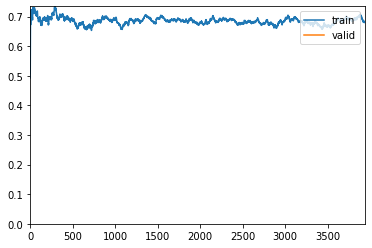

In [0]:
learner.fit_one_cycle(1,max_lr=1e-6)

In [0]:
learner.unfreeze()


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.157471,0.181586,0.928531,0.071469,51:54
1,0.116055,0.140424,0.945683,0.054317,50:16


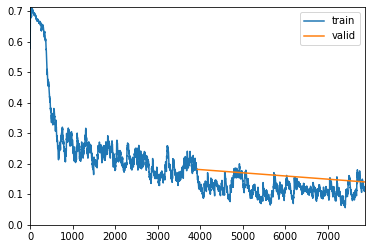

In [0]:
learner.fit_one_cycle(2, max_lr=7e-6)


In [0]:
learner.export(file = 'transformer_robertalarge_full.pkl');


In [0]:
path = './'
export_learner = load_learner(path, file = 'transformer_robertalarge_full.pkl')

In [0]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()
Test_final['user_suggestion']= Test_final.progress_apply(lambda x: learner.predict(x)[0], axis=1)
Test_final[['review_id','user_suggestion']].to_csv('submission.csv',index=False)

In [0]:
from IPython.display import HTML

def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

In [0]:
# create a link to download the dataframe which was saved with .to_csv method
create_download_link(filename='submission.csv')